<a href="https://colab.research.google.com/github/sanyagupta31/Data-analysis/blob/main/goggle_playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
zip="/content/googleplaystore.csv.zip"
with zipfile.ZipFile(zip,'r') as zip_ref:
  zip_ref.extractall('/content')
os.remove(zip)
print('file is extracted')


file is extracted


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/googleplaystore.csv')
print(df.head())
print(df.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [5]:
# Check missing values in each column
missing_data = df.isnull().sum()
print(missing_data)

# Drop columns with more than a certain percentage of missing values (e.g., 50%)
threshold = 0.5  # 50%
drop_columns = missing_data[missing_data > len(df) * threshold].index
df = df.drop(columns=drop_columns)

print("Columns dropped due to high missing values:", drop_columns)


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
Columns dropped due to high missing values: Index([], dtype='object')


In [7]:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())
df=df.dropna(subset=['Rating'])
print(df['Rating'].isnull().sum())

0


In [8]:
df['Type']=df['Type'].fillna(df['Type'].mode()[0])
df['Content Rating']=df['Content Rating'].fillna(df['Content Rating'].mode()[0])
df['Current Ver']=df['Current Ver'].fillna(df['Current Ver'].mode()[0])
df['Android Ver']=df['Android Ver'].fillna(df['Android Ver'].mode()[0])
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [9]:
# Convert 'Price' column to numeric (if it's in string format)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Verify data types
print(df.dtypes)


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [10]:
# Drop duplicate rows
df = df.drop_duplicates()

# Verify if duplicates are removed
print(f"Duplicate rows removed: {df.duplicated().sum()}")


Duplicate rows removed: 0


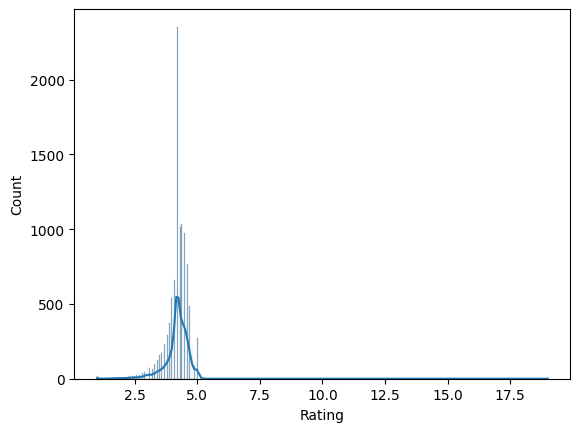

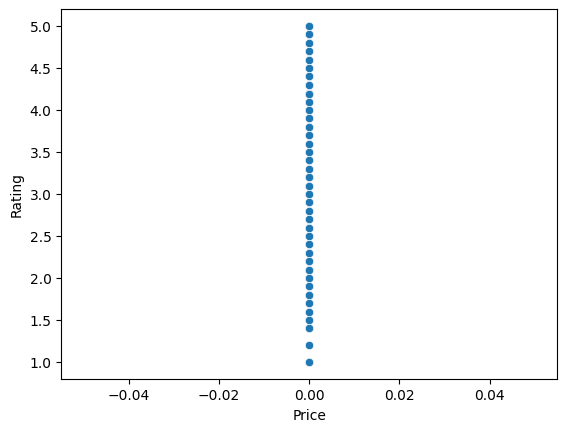

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing distribution of 'Rating' column
sns.histplot(df['Rating'], kde=True)
plt.show()

# Visualizing correlation between 'Price' and 'Rating'
sns.scatterplot(x='Price', y='Rating', data=df)
plt.show()


In [12]:
# Save cleaned data to a CSV file
df.to_csv('cleaned_data.csv', index=False)
